In [1]:
# if you want the new models you need to update pytorch and torchvision

In [2]:
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import torchvision
from torchvision import datasets, models, transforms

import matplotlib.pyplot as plt

import pickle
import time
import os
import copy
import sys

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
print(device)
print(sys.version)
print(torch.__version__)
print(torchvision.__version__)

cpu
3.8.13 (default, Mar 28 2022, 11:38:47) 
[GCC 7.5.0]
1.12.1
0.13.1


In [4]:
from torchvision.models import vgg16_bn, VGG16_BN_Weights # just for test
from torchvision.models import convnext_tiny, ConvNeXt_Tiny_Weights
from torchvision.models import efficientnet_v2_s, EfficientNet_V2_S_Weights
from torchvision.models import regnet_x_8gf, RegNet_X_8GF_Weights
from torchvision.models import swin_t, Swin_T_Weights
from torchvision.models import wide_resnet50_2, Wide_ResNet50_2_Weights

In [5]:
# from __future__ import print_function, division

# import torch.optim as optim
# from torch.optim import lr_scheduler
# import torch.backends.cudnn as cudnn
# import matplotlib.pyplot as plt
# cudnn.benchmark = True
# plt.ion() 

In [6]:
#But you want the weights also

def get_models():

    weight_dict = {'convnext_tiny': ConvNeXt_Tiny_Weights.DEFAULT,
                'efficientnet_v2_s' : EfficientNet_V2_S_Weights.DEFAULT,
                'regnet_x_8gf' : RegNet_X_8GF_Weights.DEFAULT,
                'swin_t' : Swin_T_Weights.DEFAULT,
                'wide_resnet50_2' : Wide_ResNet50_2_Weights.DEFAULT}

    model_dict = {'convnext_tiny': convnext_tiny(weights = weight_dict['convnext_tiny']).to(device),
                'efficientnet_v2_s' : efficientnet_v2_s(weights = weight_dict['efficientnet_v2_s']).to(device),
                'regnet_x_8gf' : regnet_x_8gf(weights = weight_dict['regnet_x_8gf']).to(device),
                'swin_t' : swin_t(weights = weight_dict['swin_t']).to(device),
                'wide_resnet50_2' : wide_resnet50_2(weights = weight_dict['wide_resnet50_2']).to(device)}

    return(weight_dict, model_dict)

In [7]:
weight_dict, model_dict = get_models()

# set all models to eval
for model in model_dict.keys():
    model_dict[model].eval()

In [8]:
# choose one model
model_name = 'convnext_tiny'
weights = weight_dict[model_name]
model = model_dict[model_name]

In [ ]:
# preproces and data aug
data_transforms = {
'train': transforms.Compose([weights.transforms(), transforms.RandomHorizontalFlip()]), 
'val': transforms.Compose([weights.transforms()])
}

In [9]:
# Load data - a lot needs to change here since you have a score for each image and not a class (given by dir)

data_dir = '/home/simon/Documents/Bodies/data/RA/Tutorial/hymenoptera_data'

image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in ['train', 'val']}

batch_size = 4
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=batch_size, shuffle=True, num_workers=4) for x in ['train', 'val']}

dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes
num_classes = len(class_names)

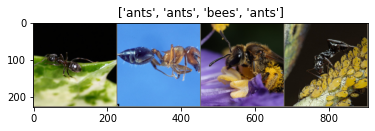

In [10]:
# Viz some images

def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [11]:
# Step 4: Use the model and print the predicted category (same images as the viz'ed)

for i in inputs:
   img = i.unsqueeze(0)

   prediction = model(img).squeeze(0).softmax(0)
   class_id = prediction.argmax().item()
   score = prediction[class_id].item()
   category_name = weights.meta["categories"][class_id]
   print(f"{category_name}: {100 * score:.1f}%")

ant: 65.1%
ant: 88.1%
bee: 67.7%
ant: 83.7%


In [ ]:
# load the model

# just for test
from torchvision.models import vgg16_bn, VGG16_BN_Weights # bn is simply the version with batch normalization

# remember weights now
# to use. All have relative few parameters. One is an transformer (swin) the rest is cnns
#from torchvision.models import convnext_tiny, efficientnet_v2_s, regnet_x_8gf, swin_t, wide_resnet50_2


In [ ]:
# depreciated
#model = vgg16_bn(pretrained = True).to(device)

# new api
weights = VGG16_BN_Weights.DEFAULT
model = vgg16_bn(weights = weights).to(device)
model.eval() # just for checking now


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

In [ ]:
# Step 2: Initialize the inference transforms
preprocess = weights.transforms()

# Step 3: Apply inference preprocessing transforms
batch = preprocess(inputs).unsqueeze(0)

In [ ]:
# data_transforms = {
#     'train': transforms.Compose([
#         transforms.RandomResizedCrop(224),
#         transforms.RandomHorizontalFlip(),
#         transforms.ToTensor(),
#         transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
#     ]),
#     'val': transforms.Compose([
#         transforms.Resize(256),
#         transforms.CenterCrop(224),
#         transforms.ToTensor(),
#         transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
#     ]),
# }

In [ ]:
# Step 4: Use the model and print the predicted category
prediction = model(batch).squeeze(0).softmax(0)
class_id = prediction.argmax().item()
score = prediction[class_id].item()
category_name = weights.meta["categories"][class_id]
print(f"{category_name}: {100 * score:.1f}%")

RuntimeError: Expected 3D (unbatched) or 4D (batched) input to conv2d, but got input of size: [1, 4, 3, 224, 224]

In [30]:
batch.shape

torch.Size([1, 4, 3, 224, 224])

In [25]:
transforms.RandomHorizontalFlip()

RandomHorizontalFlip(p=0.5)

In [24]:
batch

tensor([[[[[ 0.2918, -0.4557, -0.8913,  ...,  0.7621,  0.4527,  0.4489],
           [-0.2828, -0.8045, -1.3400,  ...,  0.6549,  0.3996,  0.4527],
           [-0.8723, -1.3364, -1.6852,  ...,  0.5798,  0.3368,  0.4022],
           ...,
           [-5.7660, -5.8928, -5.7675,  ...,  1.2642,  1.2666,  1.3448],
           [-4.1907, -4.9332, -5.4094,  ...,  1.2666,  1.2449,  1.3285],
           [-1.4404, -1.9388, -3.2483,  ...,  1.3463,  1.3323,  1.2715]],

          [[ 3.9943,  2.6342,  1.6151,  ...,  3.2717,  2.9191,  2.7881],
           [ 2.8177,  1.7153,  0.9114,  ...,  3.1596,  2.8516,  2.7286],
           [ 1.5409,  0.8949,  0.5240,  ...,  3.1181,  2.7933,  2.7115],
           ...,
           [-3.7187, -3.6891, -3.2345,  ...,  3.2494,  3.2518,  3.3337],
           [-2.2048, -2.9054, -3.1936,  ...,  3.2518,  3.2292,  3.3166],
           [ 0.1149, -0.3504, -1.6055,  ...,  3.3352,  3.3205,  3.2570]],

          [[-9.6345, -7.6931, -5.6394,  ..., -1.5614, -2.4119, -2.8528],
           [-8.

In [10]:
# print the model architectures
print(model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

In [15]:
# specific for the arthitecture.
model.classifier[6] = nn.Linear(model.classifier[6].in_features, num_classes).to(device)

# now instead of 1000 out features we just have 2
# et will be the number of attributes when you get to that
print(model.classifier[6])

Linear(in_features=4096, out_features=2, bias=True)


In [18]:
VGG16_BN_Weights.DEFAULT.transforms()

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

In [ ]:
VGG16_BN_Weights.IMAGENET1K_V1.transforms

In [ ]:
# data agumentation and resize
# likely also architecture specific

# data_transforms = {
#     'train': transforms.Compose([
#         transforms.RandomResizedCrop(224),
#         transforms.RandomHorizontalFlip(),
#         transforms.ToTensor(),
#         transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
#     ]),
#     'val': transforms.Compose([
#         transforms.Resize(256),
#         transforms.CenterCrop(224),
#         transforms.ToTensor(),
#         transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
#     ]),
# }

In [ ]:
from torchvision.io import read_image
from torchvision.models import resnet50, ResNet50_Weights

img = read_image("test/assets/encode_jpeg/grace_hopper_517x606.jpg")

# Step 1: Initialize model with the best available weights
model = resnet50(weights=weights)
model.eval()

# Step 2: Initialize the inference transforms
preprocess = weights.transforms()

# Step 3: Apply inference preprocessing transforms
batch = preprocess(img).unsqueeze(0)

# Step 4: Use the model and print the predicted category
prediction = model(batch).squeeze(0).softmax(0)
class_id = prediction.argmax().item()
score = prediction[class_id].item()
category_name = weights.meta["categories"][class_id]
print(f"{category_name}: {100 * score:.1f}%")